In [36]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["exp2-granularity.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance
0,hpccstream,9,16,3,16,2022-03-15T11:47:28Z,2022-03-15T11:47:38Z,2022-03-15T11:50:04Z,2022-03-15T11:50:05Z,3m19.266062449s,6.639090
1,hpccfft,5,16,4,4,2022-03-15T11:48:28Z,2022-03-15T11:48:34Z,2022-03-15T11:55:32Z,2022-03-15T11:55:33Z,7m48.305214113s,0.544368
2,hpccfft,7,16,4,4,2022-03-15T11:48:28Z,2022-03-15T11:48:34Z,2022-03-15T11:55:35Z,2022-03-15T11:55:35Z,7m48.295463647s,0.566577
3,hpccptrans,5,16,3,3,2022-03-15T11:49:28Z,2022-03-15T11:49:43Z,2022-03-15T12:00:18Z,2022-03-15T12:00:18Z,11m27.637485898s,0.074459
4,hpccptrans,1,16,3,3,2022-03-15T11:49:28Z,2022-03-15T11:49:42Z,2022-03-15T12:00:16Z,2022-03-15T12:00:16Z,11m27.619041343s,0.079600
...,...,...,...,...,...,...,...,...,...,...,...
64,hpccfft,8,16,3,3,2022-03-15T11:56:47Z,2022-03-15T12:35:56Z,2022-03-15T12:44:28Z,2022-03-15T12:44:29Z,48m18.958942419s,0.326554
65,hpccptrans,9,16,4,4,2022-03-15T11:58:47Z,2022-03-15T12:35:58Z,2022-03-15T12:47:00Z,2022-03-15T12:47:00Z,48m48.631234243s,0.092020
66,hpccfft,9,16,3,3,2022-03-15T11:59:48Z,2022-03-15T12:35:58Z,2022-03-15T12:43:38Z,2022-03-15T12:43:39Z,44m28.74562737s,0.352522
67,hpccrandomaccess,0,16,4,4,2022-03-15T12:01:48Z,2022-03-15T12:35:57Z,2022-03-15T12:47:11Z,2022-03-15T12:47:11Z,45m57.623077451s,0.024600


In [37]:
print (df.dtypes)

benchmark       object
times            int64
nTasks           int64
nNodes           int64
nWorkers         int64
Pending         object
Running         object
Completing      object
Completed       object
duration        object
performance    float64
dtype: object


In [40]:
from datetime import datetime
df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
df['duration'] = pd.to_timedelta(df['duration'])

In [41]:
df['init'] = df['Running'] - df['Pending']
df['run'] = df['Completing'] - df['Running']
df['final'] = df['Completed'] - df['Completing']
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,start,init,run,final
0,hpccstream,9,16,3,16,2022-03-15 11:47:28+00:00,2022-03-15 11:47:38+00:00,2022-03-15 11:50:04+00:00,2022-03-15 11:50:05+00:00,0 days 00:03:19.266062448,6.639090,2022-03-15T11:47:28Z,0 days 00:00:10,0 days 00:02:26,0 days 00:00:01
1,hpccfft,5,16,4,4,2022-03-15 11:48:28+00:00,2022-03-15 11:48:34+00:00,2022-03-15 11:55:32+00:00,2022-03-15 11:55:33+00:00,0 days 00:07:48.305214113,0.544368,2022-03-15T11:47:28Z,0 days 00:00:06,0 days 00:06:58,0 days 00:00:01
2,hpccfft,7,16,4,4,2022-03-15 11:48:28+00:00,2022-03-15 11:48:34+00:00,2022-03-15 11:55:35+00:00,2022-03-15 11:55:35+00:00,0 days 00:07:48.295463647,0.566577,2022-03-15T11:47:28Z,0 days 00:00:06,0 days 00:07:01,0 days 00:00:00
3,hpccptrans,5,16,3,3,2022-03-15 11:49:28+00:00,2022-03-15 11:49:43+00:00,2022-03-15 12:00:18+00:00,2022-03-15 12:00:18+00:00,0 days 00:11:27.637485898,0.074459,2022-03-15T11:47:28Z,0 days 00:00:15,0 days 00:10:35,0 days 00:00:00
4,hpccptrans,1,16,3,3,2022-03-15 11:49:28+00:00,2022-03-15 11:49:42+00:00,2022-03-15 12:00:16+00:00,2022-03-15 12:00:16+00:00,0 days 00:11:27.619041343,0.079600,2022-03-15T11:47:28Z,0 days 00:00:14,0 days 00:10:34,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,hpccfft,8,16,3,3,2022-03-15 11:56:47+00:00,2022-03-15 12:35:56+00:00,2022-03-15 12:44:28+00:00,2022-03-15 12:44:29+00:00,0 days 00:48:18.958942419,0.326554,2022-03-15T11:47:28Z,0 days 00:39:09,0 days 00:08:32,0 days 00:00:01
65,hpccptrans,9,16,4,4,2022-03-15 11:58:47+00:00,2022-03-15 12:35:58+00:00,2022-03-15 12:47:00+00:00,2022-03-15 12:47:00+00:00,0 days 00:48:48.631234243,0.092020,2022-03-15T11:47:28Z,0 days 00:37:11,0 days 00:11:02,0 days 00:00:00
66,hpccfft,9,16,3,3,2022-03-15 11:59:48+00:00,2022-03-15 12:35:58+00:00,2022-03-15 12:43:38+00:00,2022-03-15 12:43:39+00:00,0 days 00:44:28.745627370,0.352522,2022-03-15T11:47:28Z,0 days 00:36:10,0 days 00:07:40,0 days 00:00:01
67,hpccrandomaccess,0,16,4,4,2022-03-15 12:01:48+00:00,2022-03-15 12:35:57+00:00,2022-03-15 12:47:11+00:00,2022-03-15 12:47:11+00:00,0 days 00:45:57.623077451,0.024600,2022-03-15T11:47:28Z,0 days 00:34:09,0 days 00:11:14,0 days 00:00:00


In [42]:
df['start'] = df['Pending'][0]
df['afterstart'] = df['Pending'] - df['start']

In [43]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,start,init,run,final,afterstart
0,hpccstream,9,16,3,16,2022-03-15 11:47:28+00:00,2022-03-15 11:47:38+00:00,2022-03-15 11:50:04+00:00,2022-03-15 11:50:05+00:00,0 days 00:03:19.266062448,6.639090,2022-03-15 11:47:28+00:00,0 days 00:00:10,0 days 00:02:26,0 days 00:00:01,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-15 11:48:28+00:00,2022-03-15 11:48:34+00:00,2022-03-15 11:55:32+00:00,2022-03-15 11:55:33+00:00,0 days 00:07:48.305214113,0.544368,2022-03-15 11:47:28+00:00,0 days 00:00:06,0 days 00:06:58,0 days 00:00:01,0 days 00:01:00
2,hpccfft,7,16,4,4,2022-03-15 11:48:28+00:00,2022-03-15 11:48:34+00:00,2022-03-15 11:55:35+00:00,2022-03-15 11:55:35+00:00,0 days 00:07:48.295463647,0.566577,2022-03-15 11:47:28+00:00,0 days 00:00:06,0 days 00:07:01,0 days 00:00:00,0 days 00:01:00
3,hpccptrans,5,16,3,3,2022-03-15 11:49:28+00:00,2022-03-15 11:49:43+00:00,2022-03-15 12:00:18+00:00,2022-03-15 12:00:18+00:00,0 days 00:11:27.637485898,0.074459,2022-03-15 11:47:28+00:00,0 days 00:00:15,0 days 00:10:35,0 days 00:00:00,0 days 00:02:00
4,hpccptrans,1,16,3,3,2022-03-15 11:49:28+00:00,2022-03-15 11:49:42+00:00,2022-03-15 12:00:16+00:00,2022-03-15 12:00:16+00:00,0 days 00:11:27.619041343,0.079600,2022-03-15 11:47:28+00:00,0 days 00:00:14,0 days 00:10:34,0 days 00:00:00,0 days 00:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,hpccfft,8,16,3,3,2022-03-15 11:56:47+00:00,2022-03-15 12:35:56+00:00,2022-03-15 12:44:28+00:00,2022-03-15 12:44:29+00:00,0 days 00:48:18.958942419,0.326554,2022-03-15 11:47:28+00:00,0 days 00:39:09,0 days 00:08:32,0 days 00:00:01,0 days 00:09:19
65,hpccptrans,9,16,4,4,2022-03-15 11:58:47+00:00,2022-03-15 12:35:58+00:00,2022-03-15 12:47:00+00:00,2022-03-15 12:47:00+00:00,0 days 00:48:48.631234243,0.092020,2022-03-15 11:47:28+00:00,0 days 00:37:11,0 days 00:11:02,0 days 00:00:00,0 days 00:11:19
66,hpccfft,9,16,3,3,2022-03-15 11:59:48+00:00,2022-03-15 12:35:58+00:00,2022-03-15 12:43:38+00:00,2022-03-15 12:43:39+00:00,0 days 00:44:28.745627370,0.352522,2022-03-15 11:47:28+00:00,0 days 00:36:10,0 days 00:07:40,0 days 00:00:01,0 days 00:12:20
67,hpccrandomaccess,0,16,4,4,2022-03-15 12:01:48+00:00,2022-03-15 12:35:57+00:00,2022-03-15 12:47:11+00:00,2022-03-15 12:47:11+00:00,0 days 00:45:57.623077451,0.024600,2022-03-15 11:47:28+00:00,0 days 00:34:09,0 days 00:11:14,0 days 00:00:00,0 days 00:14:20


In [7]:
df['benchmark'].unique()

array(['hpccfft', 'hpccdgemm', 'hpccrandomringbw', 'hpccrandomringlat',
       'hpccrandomaccess', 'hpccptrans', 'hpccstream'], dtype=object)

In [8]:
df['nWorkers'].unique()

array([ 4, 16])

#  performance

In [44]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_performance = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_mean' : mean(x['performance']),
                  'model_time_std' : std(x['performance']),
              })).reset_index()
            df_performance.append(df_senario)

In [45]:
df_performance = pd.concat(df_performance, axis=0)
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std
0,hpccstream,16,3,16,6.333003,0.803121
1,hpccstream,16,2,16,5.383903,1.974853
2,hpccstream,16,1,16,3.805000,0.087332
0,hpccfft,16,4,4,0.603628,0.068703
0,hpccfft,16,1,1,9.679323,0.084522
0,hpccfft,16,2,2,0.503140,0.081452
0,hpccfft,16,3,3,0.339538,0.012984
0,hpccptrans,16,3,3,-0.180761,0.473362
0,hpccptrans,16,1,1,1.790320,0.000000
0,hpccptrans,16,2,2,0.151782,0.052356


    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccstream      16       3        16         6.333003        0.803121
1  hpccstream      16       2        16         5.383903        1.974853
2  hpccstream      16       1        16         3.805000        0.087332
  benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0   hpccfft      16       4         4         0.603628        0.068703
0   hpccfft      16       1         1         9.679323        0.084522
0   hpccfft      16       2         2         0.503140        0.081452
0   hpccfft      16       3         3         0.339538        0.012984
    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccptrans      16       3         3        -0.180761        0.473362
0  hpccptrans      16       1         1         1.790320        0.000000
0  hpccptrans      16       2         2         0.151782        0.052356
0  hpccptrans      16       4         4         0.092020     

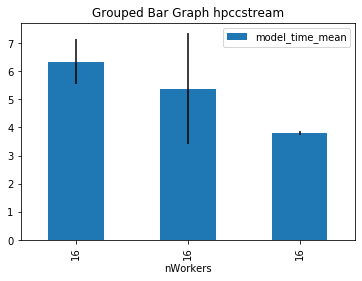

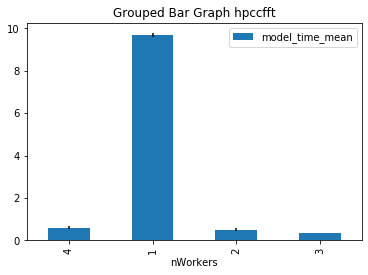

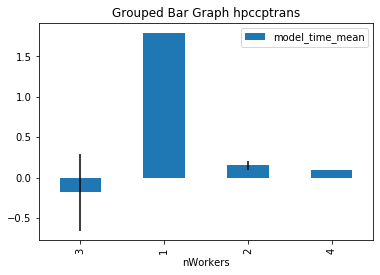

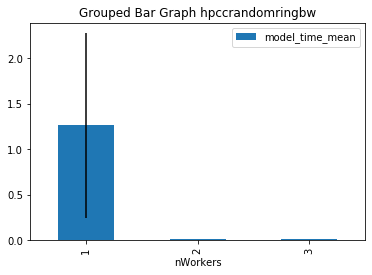

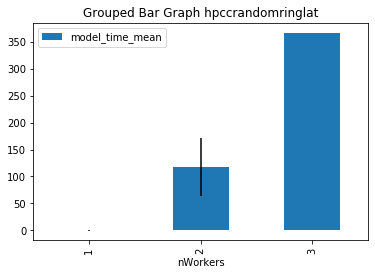

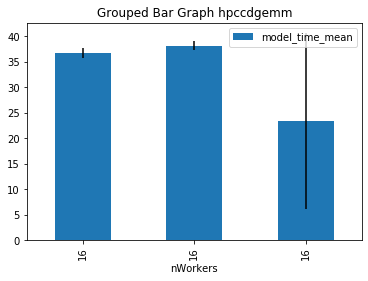

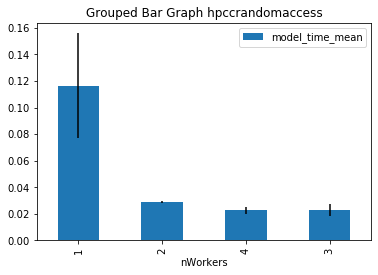

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

#  time slot

In [47]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_mean' : mean(x['init']),
                  'init_std' : std(x['init']),
                'run_mean' : mean(x['run']),
                  'run_std' : std(x['run']),
                'final_mean' : mean(x['final']),
                  'final_std' : std(x['final']),
                'duration_mean' : mean(x['duration']),
                  'duration_std' : std(x['duration']),
              })).reset_index()
            df_time.append(df_senario)

In [48]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std
0,hpccstream,16,3,16,0 days 00:10:05.500000,0 days 00:12:21.194137861,0 days 00:02:14.500000,0 days 00:00:10.965856099,0 days 00:00:00.750000,0 days 00:00:00.433012701,0 days 00:13:04.495833716,0 days 00:12:12.947455382
1,hpccstream,16,2,16,0 days 00:17:20.666666666,0 days 00:07:40.620113421,0 days 00:01:59,0 days 00:00:12.328828005,0 days 00:00:00.666666666,0 days 00:00:00.471404520,0 days 00:20:07.174872301,0 days 00:07:26.333285883
2,hpccstream,16,1,16,0 days 00:29:49.666666666,0 days 00:03:32.797765234,0 days 00:02:01.333333333,0 days 00:00:04.784233364,0 days 00:00:00.333333333,0 days 00:00:00.471404520,0 days 00:32:39.473218164,0 days 00:03:32.796401271
0,hpccfft,16,4,4,0 days 00:04:42.333333333,0 days 00:06:30.794347735,0 days 00:06:15.666666666,0 days 00:01:02.001792088,0 days 00:00:00.666666666,0 days 00:00:00.471404520,0 days 00:11:38.171261313,0 days 00:05:25.086576125
0,hpccfft,16,1,1,0 days 00:15:07,0 days 00:03:50.291120106,0 days 00:01:18.333333333,0 days 00:00:06.599663291,0 days 00:00:01,0 days 00:00:00.816496580,0 days 00:17:04.702016158,0 days 00:03:42.314336349
0,hpccfft,16,2,2,0 days 00:21:57.500000,0 days 00:08:11.500000,0 days 00:05:22,0 days 00:00:30,0 days 00:00:00.500000,0 days 00:00:00.500000,0 days 00:27:59.643625204,0 days 00:07:41.001499740
0,hpccfft,16,3,3,0 days 00:37:39.500000,0 days 00:01:29.500000,0 days 00:08:06,0 days 00:00:26,0 days 00:00:01,0 days 00:00:00,0 days 00:46:23.852284894,0 days 00:01:55.106657524
0,hpccptrans,16,3,3,0 days 00:05:46.250000,0 days 00:09:14.868171280,0 days 00:09:03.750000,0 days 00:01:30.926824974,0 days 00:00:00.250000,0 days 00:00:00.433012701,0 days 00:15:29.772907724,0 days 00:08:23.977152789
0,hpccptrans,16,1,1,0 days 00:19:42,0 days 00:00:00,0 days 00:02:28,0 days 00:00:00,0 days 00:00:02,0 days 00:00:00,0 days 00:22:54.369466683,0 days 00:00:00
0,hpccptrans,16,2,2,0 days 00:26:35.666666666,0 days 00:06:15.269976890,0 days 00:07:05.666666666,0 days 00:01:47.257737353,0 days 00:00:00,0 days 00:00:00,0 days 00:34:21.580599742,0 days 00:07:51.723359959


<ipython-input-49-dbdb2ccec5d7>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-dbdb2ccec5d7>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



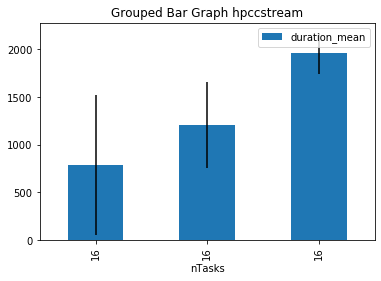

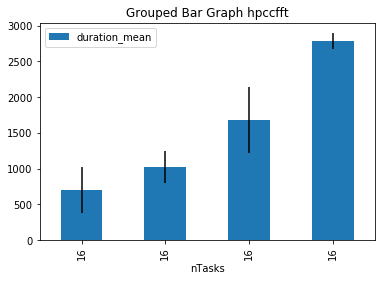

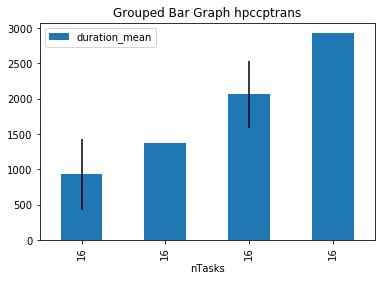

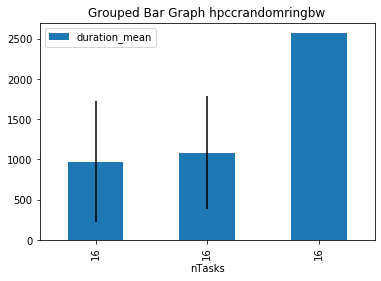

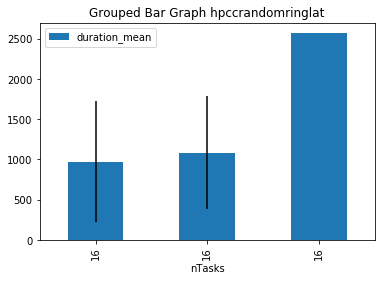

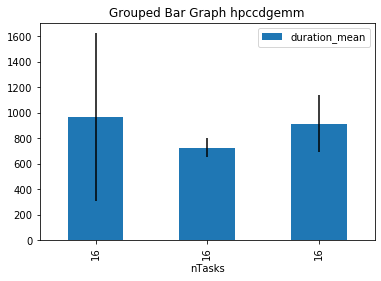

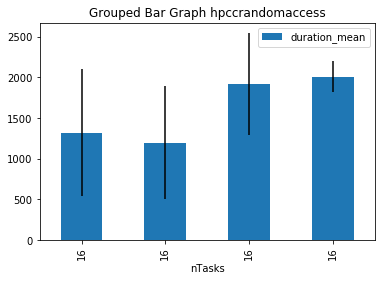

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_mean'] = df_bench['duration_mean'].dt.total_seconds()
    df_bench['duration_std'] = df_bench['duration_std'].dt.total_seconds()

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_mean',
                  yerr='duration_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

In [50]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nTasks.unique():
            df_senario = df_bench[df_bench.nTasks == nTasks]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_sum' : sum(x['init'].dt.total_seconds()),
                'run_sum' : sum(x['run'].dt.total_seconds()),
                'final_sum' : sum(x['final'].dt.total_seconds()),
                'duration_sum' : sum(x['duration'].dt.total_seconds()),
              })).reset_index()
            df_time.append(df_senario)

In [51]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum
0,hpccstream,16,10913.0,1259.0,6.0,12637.927606
0,hpccfft,16,10722.0,2978.0,8.0,14095.611653
0,hpccptrans,16,9585.0,4262.0,3.0,14206.834131
0,hpccrandomringbw,16,10309.0,989.0,4.0,11663.965508
0,hpccrandomringlat,16,10309.0,989.0,4.0,11663.965508
0,hpccdgemm,16,6430.0,2144.0,10.0,9030.908479
0,hpccrandomaccess,16,12518.0,3086.0,2.0,15985.806557


<ipython-input-52-1521fc477d73>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



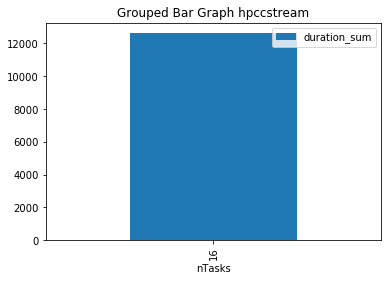

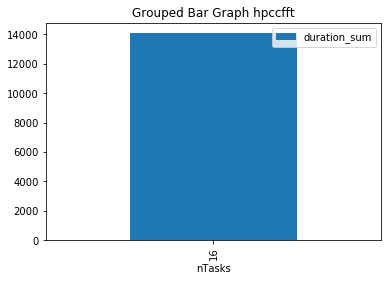

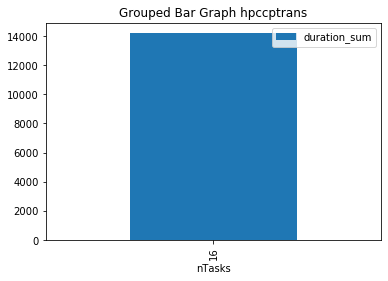

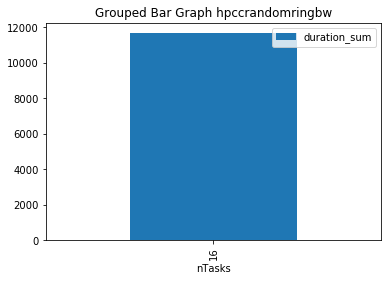

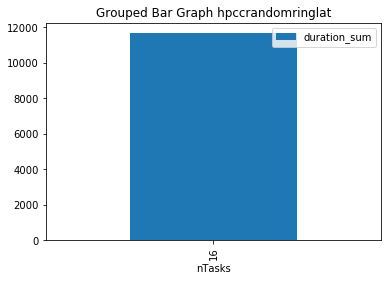

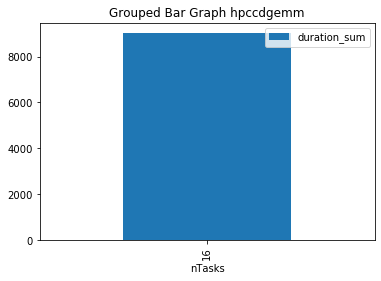

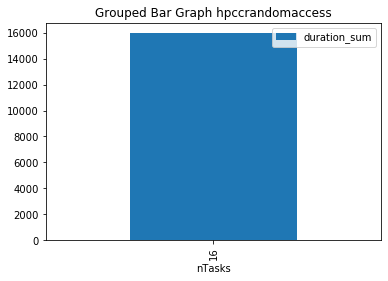

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_sum'] = df_bench['duration_sum']

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_sum',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

# Graph

In [53]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,start,init,run,final,afterstart
0,hpccstream,9,16,3,16,2022-03-15 11:47:28+00:00,2022-03-15 11:47:38+00:00,2022-03-15 11:50:04+00:00,2022-03-15 11:50:05+00:00,0 days 00:03:19.266062448,6.639090,2022-03-15 11:47:28+00:00,0 days 00:00:10,0 days 00:02:26,0 days 00:00:01,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-15 11:48:28+00:00,2022-03-15 11:48:34+00:00,2022-03-15 11:55:32+00:00,2022-03-15 11:55:33+00:00,0 days 00:07:48.305214113,0.544368,2022-03-15 11:47:28+00:00,0 days 00:00:06,0 days 00:06:58,0 days 00:00:01,0 days 00:01:00
2,hpccfft,7,16,4,4,2022-03-15 11:48:28+00:00,2022-03-15 11:48:34+00:00,2022-03-15 11:55:35+00:00,2022-03-15 11:55:35+00:00,0 days 00:07:48.295463647,0.566577,2022-03-15 11:47:28+00:00,0 days 00:00:06,0 days 00:07:01,0 days 00:00:00,0 days 00:01:00
3,hpccptrans,5,16,3,3,2022-03-15 11:49:28+00:00,2022-03-15 11:49:43+00:00,2022-03-15 12:00:18+00:00,2022-03-15 12:00:18+00:00,0 days 00:11:27.637485898,0.074459,2022-03-15 11:47:28+00:00,0 days 00:00:15,0 days 00:10:35,0 days 00:00:00,0 days 00:02:00
4,hpccptrans,1,16,3,3,2022-03-15 11:49:28+00:00,2022-03-15 11:49:42+00:00,2022-03-15 12:00:16+00:00,2022-03-15 12:00:16+00:00,0 days 00:11:27.619041343,0.079600,2022-03-15 11:47:28+00:00,0 days 00:00:14,0 days 00:10:34,0 days 00:00:00,0 days 00:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,hpccfft,8,16,3,3,2022-03-15 11:56:47+00:00,2022-03-15 12:35:56+00:00,2022-03-15 12:44:28+00:00,2022-03-15 12:44:29+00:00,0 days 00:48:18.958942419,0.326554,2022-03-15 11:47:28+00:00,0 days 00:39:09,0 days 00:08:32,0 days 00:00:01,0 days 00:09:19
65,hpccptrans,9,16,4,4,2022-03-15 11:58:47+00:00,2022-03-15 12:35:58+00:00,2022-03-15 12:47:00+00:00,2022-03-15 12:47:00+00:00,0 days 00:48:48.631234243,0.092020,2022-03-15 11:47:28+00:00,0 days 00:37:11,0 days 00:11:02,0 days 00:00:00,0 days 00:11:19
66,hpccfft,9,16,3,3,2022-03-15 11:59:48+00:00,2022-03-15 12:35:58+00:00,2022-03-15 12:43:38+00:00,2022-03-15 12:43:39+00:00,0 days 00:44:28.745627370,0.352522,2022-03-15 11:47:28+00:00,0 days 00:36:10,0 days 00:07:40,0 days 00:00:01,0 days 00:12:20
67,hpccrandomaccess,0,16,4,4,2022-03-15 12:01:48+00:00,2022-03-15 12:35:57+00:00,2022-03-15 12:47:11+00:00,2022-03-15 12:47:11+00:00,0 days 00:45:57.623077451,0.024600,2022-03-15 11:47:28+00:00,0 days 00:34:09,0 days 00:11:14,0 days 00:00:00,0 days 00:14:20


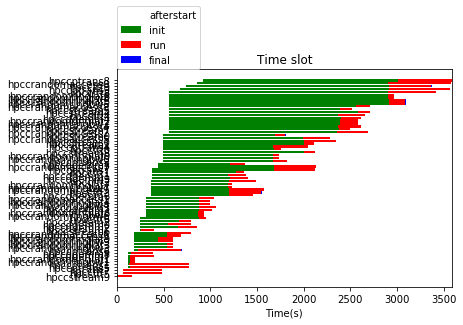

In [54]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 1])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
